# Worksheet 15

Name:  Taoyu Chen
UID: U82740711

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

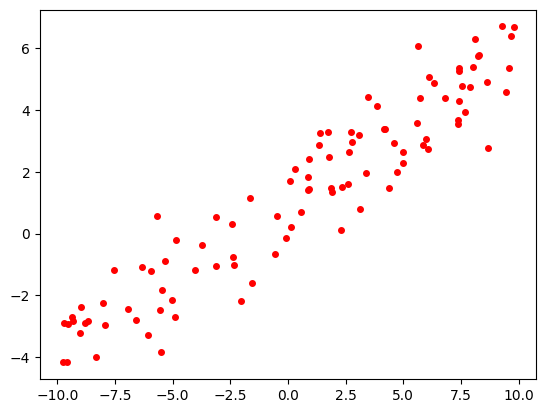

In [3]:
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = beta[0]+(beta[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

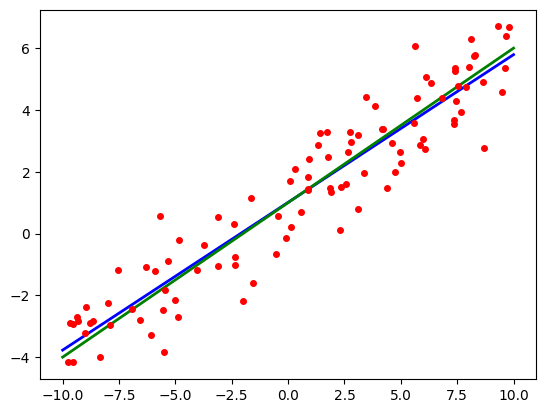

[1.  0.5]
[1.00885453 0.47807656]


In [5]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta_est = np.linalg.inv(X.T @ X) @X.T @ylin

xplot = np.linspace(-10,10,50)
yestplot = beta_est[0] + beta_est[1] * xplot
y_true = beta[0] + beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xplot, y_true,'g-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

print(beta)
print(beta_est)

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

We can see that the estimated values are very close to the true values of beta, which is expected given that the sample size is 100 and the noise added to ylin is small. Thus, we can say that the model was able to estimate the true parameters of the linear regression model fairly accurately.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

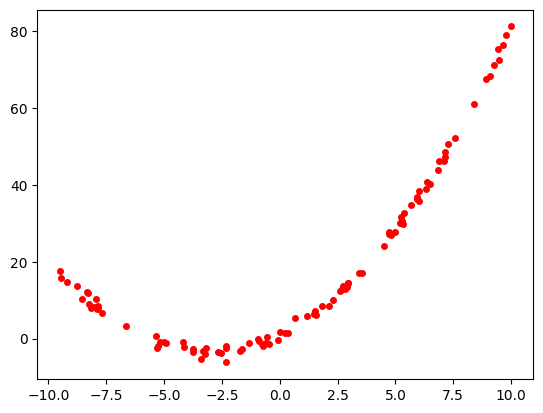

In [8]:
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , 3, .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = beta[0]+(beta[1]*xlin)+(beta[2]*xlin**2)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

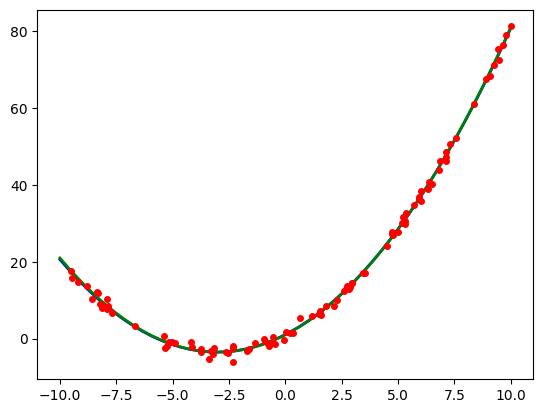

[1.06614062 3.01032583 0.49645083]


In [11]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin,xlin**2]).T
beta_est = np.linalg.inv(X.T @ X) @X.T @ylin

xplot = np.linspace(-10,10,50)
yestplot = beta_est[0] + beta_est[1] * xplot + beta_est[2]*xplot**2
y_true = beta[0] + beta[1] * xplot+ beta[2]*xplot**2
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xplot, y_true,'g-',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

print(beta_est)

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

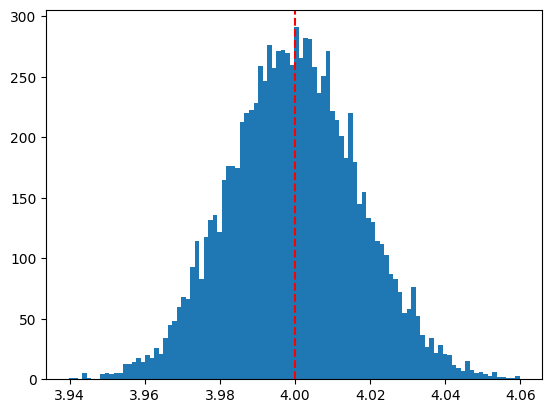

In [12]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([ 3,4 ])
for _ in range(10000):
    xlin = -10.0 + 20.0 * np.random.random(100)
    ylin = true_beta[0] + true_beta[1]*xlin + np.random.randn(100)
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    betas.append(np.linalg.inv(X.T @ X) @X.T @ylin)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()